In [114]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn.linear_model

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score




In [115]:
#import modified data sheet
data = pd.read_csv('SeoulBikeData_mod.csv')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,1
8756,11,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,1
8757,11,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,1
8758,11,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0,1


In [116]:
#print data and describe the values in each feature
data
data.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,6.526027,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2.504110,0.049315,0.966324
std,3.448048,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,1.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.000000,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
50%,7.000000,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,0.000000,1.000000
75%,10.000000,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,3.000000,0.000000,1.000000
max,12.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,4.000000,1.000000,1.000000


The following modifications were made from the original data sheet provide on UCI Repository, and are now what you see
in this document. This format allows for easier analysis and Machine Learning applications.
no holiday = 0, holiday = 1;
functional day = 1, non functional day = 0;
winter = 1
spring = 2
summer = 3
autumn = 4

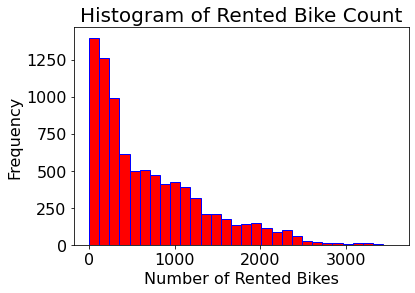

In [117]:
# plot histogram for rented bike count
rented_bike_count= data['Rented Bike Count']

plt.hist(rented_bike_count, bins=30, color='red', edgecolor='blue')


plt.title('Histogram of Rented Bike Count', fontsize= 20 )
plt.rc('font',size=16) 
plt.xlabel('Number of Rented Bikes', fontsize= 16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

This graph shows that it is more common for well under 1000 bikes to be rented per hour, rather than have over 1500 bikes rented per hour.

In [118]:
#define X and Y for rented bike count
X = data['Rented Bike Count']
y = data['Rented Bike Count']

In [119]:
# design matrix and target
X = data.drop(['Rented Bike Count'], axis=1)
y = data['Rented Bike Count']

#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [120]:
#Create linear regression model
model = linear_model.LinearRegression()

#Train the model using the train data
model.fit(X_train, y_train)

#Use the model to predict the test data
y_pred = model.predict(X_test)

#Form residual for the plot
resid = y_test - y_pred



In [121]:
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(np.mean(resid**2))
print('The Root Mean Squared Error is',RMSE)
print()

# Mean Absolute Error (MAE)
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

#Rsquared (R2)
R2 = r2_score(y_test, y_pred)
print('The Rsquared value is',R2)

The Root Mean Squared Error is 434.781776952508

The Mean Absolute Error is 326.11965370421905

The Rsquared value is 0.5376547607302218


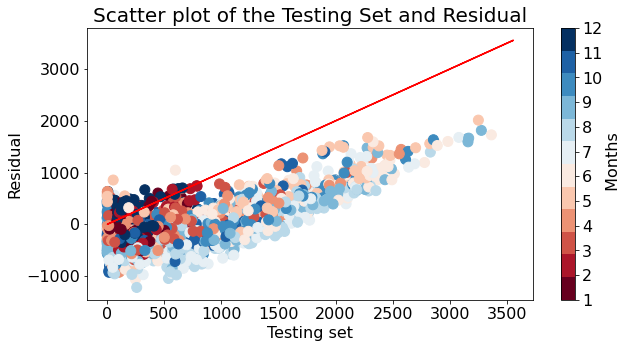

In [122]:
#plot color map for the linear regression of test data vs residual
key = X_test['Date']

fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, resid,c=key,s=100, cmap=plt.cm.get_cmap('RdBu', 12,))
plt.colorbar(ticks=range(13), label=' Months')
plt.title('Scatter plot of the Testing Set and Residual', fontsize=20)
plt.xlabel('Testing set', fontsize=16)
plt.ylabel('Residual', fontsize=16)
plt.plot(y_train, y_train, 'r')
plt.show()

Upon viewing the scatter plot versus the linear plot line, it appears that the Linear Model does not give the best
prediction of the bike count. This is most likely due to the variance in the high RMSE and MAE values, as well as the low R squared value.

Create a Decision Tree Regression Model

In [126]:
#use same x train, x test, y train, y test as linear regession

#Create Decision Tree Regressor object
dec_tree1 = DecisionTreeRegressor(max_depth=1) 
dec_tree2 = DecisionTreeRegressor(max_depth=3)
dec_tree3 = DecisionTreeRegressor(max_depth=12)

#Train the model using the train data
dec_tree1.fit(X_train, y_train)
dec_tree2.fit(X_train, y_train)
dec_tree3.fit(X_train, y_train)

#Use the model to predict the test data
y_pred_tree1 = regr_tree1.predict(X_test)
y_pred_tree2 = regr_tree2.predict(X_test)
y_pred_tree3 = regr_tree3.predict(X_test)

#Form residual for plot
resid_tree1 = y_test - y_pred_tree1
resid_tree2 = y_test - y_pred_tree2
resid_tree3 = y_test - y_pred_tree3

In [127]:
#Root mean squared error, mean absolute error, and Rsquared values for max depth = 1
RMSE_tree1 = np.sqrt(np.mean(resid_tree1**2))
print('The Root Mean Squared Error for max depth = 1 is',RMSE_tree1)
MAE_tree1 = np.mean(np.abs(resid_tree1))
print('The Mean Absolute Error for max depth = 1 is',MAE_tree1)
R2_tree1 = r2_score(y_test, y_pred_tree1)
print('The Rsquared value for max depth = 1 is',R2_tree1)
print()

#Root mean squared error, mean absolute error, and Rsquared values for max depth = 3
RMSE_tree2 = np.sqrt(np.mean(resid_tree2**2))
print('The Root Mean Squared Error for max depth = 3 is',RMSE_tree2)
MAE_tree2 = np.mean(np.abs(resid_tree2))
print('The Mean Absolute Error for max depth = 3 is',MAE_tree2)
R2_tree2 = r2_score(y_test, y_pred_tree2)
print('The Rsquared value for max depth = 3 is',R2_tree2)
print()

#Root mean squared error, mean absolute error, and Rsquared values for max depth = 12
RMSE_tree3 = np.sqrt(np.mean(resid_tree3**2))
print('The Root Mean Squared Error for max depth = 12 is',RMSE_tree3)
MAE_tree3 = np.mean(np.abs(resid_tree3))
print('The Mean Absolute Error for max depth = 12 is',MAE_tree3)
R2_tree3 = r2_score(y_test, y_pred_tree3)
print('The Rsquared value for max depth = 12 is',R2_tree3)


The Root Mean Squared Error for max depth = 1 is 555.8985786484666
The Mean Absolute Error for max depth = 1 is 414.2546413786825
The Rsquared value for max depth = 1 is 0.24418614122912985

The Root Mean Squared Error for max depth = 3 is 419.04504268296637
The Mean Absolute Error for max depth = 3 is 289.48780778824994
The Rsquared value for max depth = 3 is 0.570517830397014

The Root Mean Squared Error for max depth = 12 is 201.5329698971694
The Mean Absolute Error for max depth = 12 is 110.38388174932062
The Rsquared value for max depth = 12 is 0.9006618806820823


This shows that as max depth increases, the value for RMSE and MAE decreases while the Rswuared value increases.
Lower RMSE and MAE values and higher Rsquared values are all signs of a good max depth

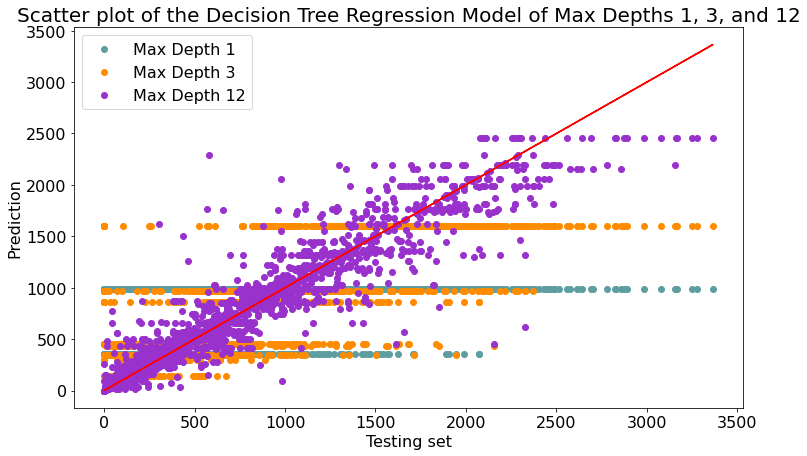

In [132]:
#plot scatter plot for decision tree using max depth 1, 3, and 12
fig = plt.figure(figsize=(12,7))
plt.scatter(y_test, y_pred_tree1, c='cadetblue', label='Max Depth 1')
plt.scatter(y_test, y_pred_tree2, c='darkorange', label='Max Depth 3')
plt.scatter(y_test, y_pred_tree3, c='darkorchid', label='Max Depth 12')
plt.plot(y_test, y_test, 'r')
plt.title('Scatter plot of the Decision Tree Regression Model of Max Depths 1, 3, and 12', fontsize=20)
plt.xlabel('Testing set', fontsize=16)
plt.ylabel('Prediction', fontsize=16)
plt.legend()

This graph also shows that the decision tree with max depth 12 most closely aligns with the regression line.

Perform random forest regression, determine RMSE, MAE, and R2 values

In [129]:
#follow same steps as decision tree, now with random forest regressor
reg_forest1 = sklearn.ensemble.RandomForestRegressor(max_depth=2)
reg_forest2 = sklearn.ensemble.RandomForestRegressor(max_depth=5)
reg_forest3 = sklearn.ensemble.RandomForestRegressor(max_depth=15)

#train model using train data
reg_forest1.fit(X_train, y_train)
reg_forest2.fit(X_train, y_train)
reg_forest3.fit(X_train, y_train)

#use model to predict test data
y_pred_for1 = reg_forest1.predict(X_test)
y_pred_for2 = reg_forest2.predict(X_test)
y_pred_for3 = reg_forest3.predict(X_test)

#Form residual for random forest 
resid_for1 = y_test - y_pred_for1
resid_for2 = y_test - y_pred_for2
resid_for3 = y_test - y_pred_for3



In [130]:
#Root mean squared error, mean absolute error, and Rsquared values for max depth = 2
RMSE_for1 = np.sqrt(np.mean(resid_for1**2))
print('The Root Mean Squared Error for max depth = 2 is',RMSE_for1)
MAE_for1 = np.mean(np.abs(resid_for1))
print('The Mean Absolute Error for max depth = 2 is',MAE_for1)
R2_for1 = r2_score(y_test, y_pred_for1)
print('The Rsquared value for max depth = 2 is',R2_for1)
print()

#Root mean squared error, mean absolute error, and Rsquared values for max depth = 5
RMSE_for2 = np.sqrt(np.mean(resid_for2**2))
print('The Root Mean Squared Error for max depth = 5 is',RMSE_for2)
MAE_for2 = np.mean(np.abs(resid_for2))
print('The Mean Absolute Error for max depth = 5 is',MAE_for2)
R2_for2 = r2_score(y_test, y_pred_for2)
print('The Rsquared value for max depth = 5 is',R2_for2)
print()

#Root mean squared error, mean absolute error, and Rsquared values for max depth = 15
RMSE_for3 = np.sqrt(np.mean(resid_for3**2))
print('The Root Mean Squared Error for max depth = 15 is',RMSE_for3)
MAE_for3 = np.mean(np.abs(resid_for3))
print('The Mean Absolute Error for max depth = 15 is',MAE_for3)
R2_for3 = r2_score(y_test, y_pred_for3)
print('The Rsquared value for max depth = 15 is',R2_for3)

The Root Mean Squared Error for max depth = 2 is 467.8257646385751
The Mean Absolute Error for max depth = 2 is 338.5053319258568
The Rsquared value for max depth = 2 is 0.46470646781808356

The Root Mean Squared Error for max depth = 5 is 312.6138288872975
The Mean Absolute Error for max depth = 5 is 211.59274413208806
The Rsquared value for max depth = 5 is 0.7609767786498965

The Root Mean Squared Error for max depth = 15 is 226.45201277882714
The Mean Absolute Error for max depth = 15 is 139.99581371800707
The Rsquared value for max depth = 15 is 0.8745773148915116


Similar to the results of the decision tree, the increase in max depth allowed for a decrease in RMSE and MAE, as well as an inrease in R2 value. This means that having higher depth is optimal for data analysis, and allows for more points to be included. These results were expected to be similar to or the same as those for the decision tree regression model.

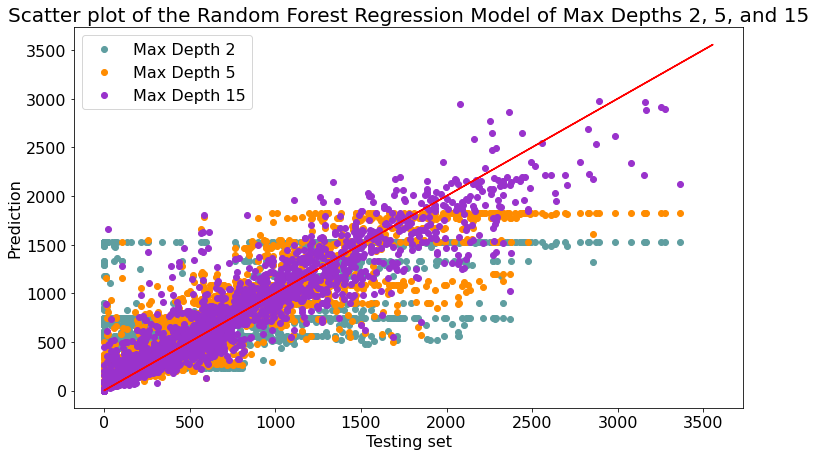

In [133]:
#plot scatter plot for decision tree using max depth 1, 3, and 12
fig = plt.figure(figsize=(12,7))
plt.scatter(y_test, y_pred_for1, c='cadetblue', label='Max Depth 2')
plt.scatter(y_test, y_pred_for2, c='darkorange', label='Max Depth 5')
plt.scatter(y_test, y_pred_for3, c='darkorchid', label='Max Depth 15')
plt.plot(y_train, y_train, 'r')
plt.title('Scatter plot of the Random Forest Regression Model of Max Depths 2, 5, and 15', fontsize=20)
plt.xlabel('Testing set', fontsize=16)
plt.ylabel('Prediction', fontsize=16)
plt.legend()

Also aligning with the results of the Decision Tree Regression Model, the values with the max depth of 15 allows for a correlation most aligning with the residual line. This confirms that this data is more accurate than having a smaller depth size.